In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
%matplotlib inline 

In [4]:
df = pd.read_csv("Wholesale_ customers_ data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


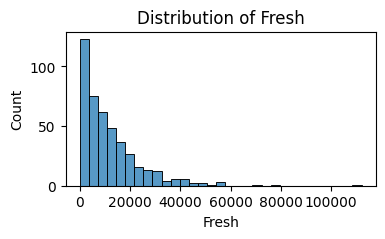

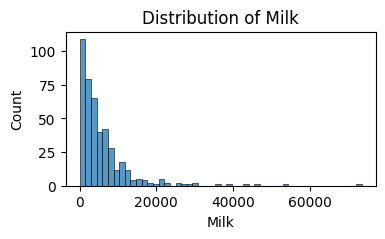

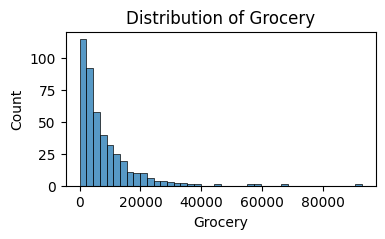

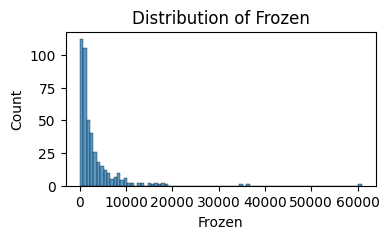

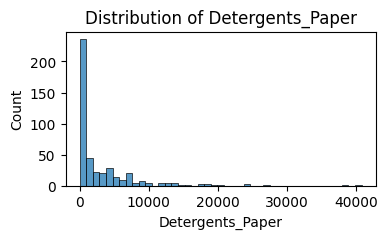

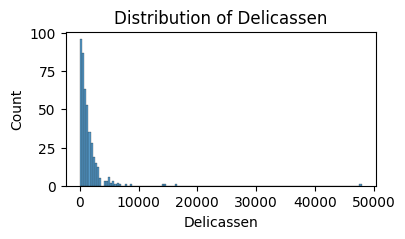

In [22]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in columns:
    plt.figure(figsize=(4,2))
    sns.histplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.show()

In [26]:
#perform the Shapiro-wilk test for normality
for column in columns:
    stat, p = shapiro(column)
    print(f"{column}: Statistics={stat}, p-value={p}")
    

Fresh: Statistics=nan, p-value=nan
Milk: Statistics=nan, p-value=nan
Grocery: Statistics=nan, p-value=nan
Frozen: Statistics=nan, p-value=nan
Detergents_Paper: Statistics=nan, p-value=nan
Delicassen: Statistics=nan, p-value=nan


/tmp/ipykernel_6607/2191254577.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(column)


Handling Missing vlaues

In [9]:
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
df1 = df.dropna()
print(df1.isna().sum())


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Outliner Detection

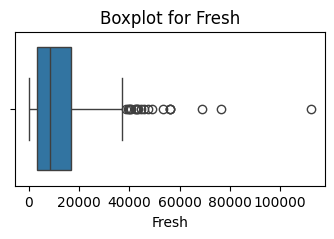

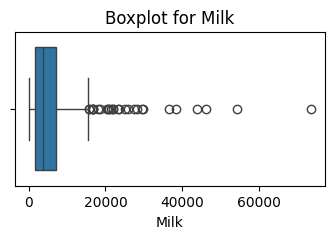

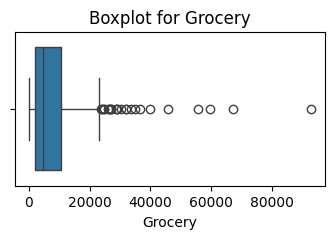

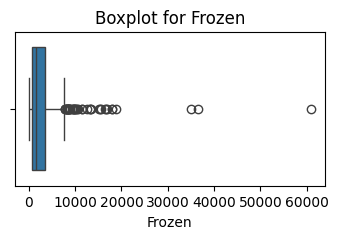

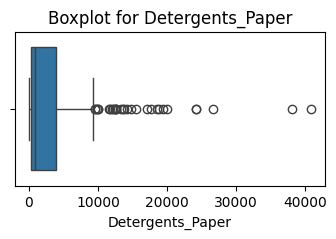

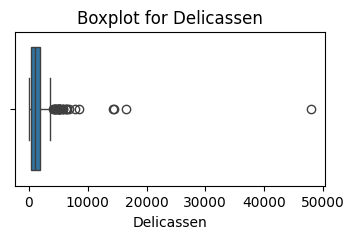

Outliers in continuous variables:
     Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23         2       3   26373  36423    22019    5154              4337   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
56         2       3    4098  29892    26866    2616             17740   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
71         1       3   18291   1266    21042    5373              4173   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
87         1       3   43265   5025     8117    6312              1579   
92         2       3    9198  27472    32034    3232             18906   
93         1       3   11314   3090     2062   35009                71   
103 

In [19]:
from scipy.stats import zscore

# Boxplots for outliers
for column in columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Detect outliers using Z-scores
outliers = df1[(abs(zscore(df1[columns])) > 3).any(axis=1)]
print("Outliers in continuous variables:")
print(outliers)

Handling Outliners

In [27]:
# Remove the outliers
# data_no_outliers = df1[(abs(zscore(df1[columns])) <= 3).all(axis=1)]

# Alternatively, cap outliers using IQR
Q1 = df1[columns].quantile(0.25)
Q3 =df1[columns].quantile(0.75)
IQR = Q3 - Q1

data_capped = df1.copy()
for col in columns:
    data_capped[col] = df1[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])

save the tranformed data

In [28]:
data_capped.to_csv('Group1.csv', index=False)

In [29]:
# Load the saved CSV as a new DataFrame
Assignment1_Group1 = pd.read_csv('Group1.csv')
print(Assignment1_Group1.head())

   Channel  Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669.0  9656.0   7561.0   214.0            2674.0   
1        2       3   7057.0  9810.0   9568.0  1762.0            3293.0   
2        2       3   6353.0  8808.0   7684.0  2405.0            3516.0   
3        1       3  13265.0  1196.0   4221.0  6404.0             507.0   
4        2       3  22615.0  5410.0   7198.0  3915.0            1777.0   

   Delicassen  
0     1338.00  
1     1776.00  
2     3938.25  
3     1788.00  
4     3938.25  


In [15]:
total_spending = data_capped[columns].sum()
print("Highest annual spending variable:", total_spending.idxmax())

Highest annual spending variable: Fresh


In [30]:
most_used_channel = data_capped['Channel'].value_counts().idxmax()
print("Most used retail channel:", most_used_channel)

Most used retail channel: 1


In [31]:
region_spending = data_capped.groupby('Region')[columns].sum().sum(axis=1)
lowest_purchasing_power = region_spending.idxmin()
print("Region with the lowest purchasing power:", lowest_purchasing_power)

Region with the lowest purchasing power: 2


In [32]:
milk_spending_by_region = data_capped.groupby('Region')['Milk'].sum()
highest_milk_spending_region = milk_spending_by_region.idxmax()
print("Region that spends the most on Milk:", highest_milk_spending_region)

Region that spends the most on Milk: 3
